In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [1]:
data = pd.read_csv('clean_data.csv')
data.head()

NameError: name 'pd' is not defined

In [ ]:
site_mapping = {'Momondo': 0, 'Kayak': 1}
data_copy['Site'] = data_copy['Site'].map(site_mapping)

print("🔹 Site Mapping:", site_mapping)
print(data_copy['Site'].unique())  # לוודא שיש רק 0 ו-1


🔹 Site Mapping: {'Momondo': 0, 'Kayak': 1}
[0 1]


In [ ]:
import pandas as pd

# 🎯 שלב 1: עדכון מילון מידע על שדות התעופה כולל SOU
airports_info = {
    'London': {
        'Heathrow': {'code': 'LHR', 'distance_from_city_center(km)': '23'},
        'Gatwick': {'code': 'LGW', 'distance_from_city_center(km)': '45'},
        'Stansted': {'code': 'STN', 'distance_from_city_center(km)': '64'},
        'Luton': {'code': 'LTN', 'distance_from_city_center(km)': '56'},
        'City': {'code': 'LCY', 'distance_from_city_center(km)': '11'},
        'Southend': {'code': 'SEN', 'distance_from_city_center(km)': '64'},
        'Southampton': {'code': 'SOU', 'distance_from_city_center(km)': '110'},  # ✅ הוספנו את SOU
    },
    'Rome': {
        'Fiumicino': {'code': 'FCO', 'distance_from_city_center(km)': '32'},
        'Ciampino': {'code': 'CIA', 'distance_from_city_center(km)': '15'},
    },
    'Paris': {
        'Charles de Gaulle': {'code': 'CDG', 'distance_from_city_center(km)': '25'},
        'Orly': {'code': 'ORY', 'distance_from_city_center(km)': '13'},
        'Beauvais-Tille': {'code': 'BVA', 'distance_from_city_center(km)': '85'},
    }
}

# 🎯 שלב 2: יצירת מילון תרגום משדה תעופה למרחק ממרכז העיר
airport_distances = {}

for city, airports in airports_info.items():
    for airport_name, details in airports.items():
        if 'distance_from_city_center(km)' in details:
            if 'code' in details:
                airport_code = details['code'].upper()  # הפיכת קוד לאותיות גדולות
                airport_distances[airport_code] = float(details['distance_from_city_center(km)'])  # המרה ל-float

# 🎯 שלב 3: פונקציה למציאת המרחק לפי קוד שדה תעופה
def get_airport_distance(airport):
    if pd.isna(airport):  # אם הערך חסר, נחזיר None
        return None
    return airport_distances.get(airport.upper(), None)  # השוואה לפי קוד באותיות גדולות

# 🎯 שלב 4: הוספת המרחקים לכל שדה תעופה בטבלה
data_copy['Onward Departure Airport Distance'] = data_copy['Onward Departure Airport'].apply(get_airport_distance)
data_copy['Onward Arrival Airport Distance'] = data_copy['Onward Arrival Airport'].apply(get_airport_distance)
data_copy['Return Departure Airport Distance'] = data_copy['Return Departure Airport'].apply(get_airport_distance)
data_copy['Return Arrival Airport Distance'] = data_copy['Return Arrival Airport'].apply(get_airport_distance)

# 🎯 שלב 5: בדיקות לוודא שהתהליך עבד
print("📌 בדיקת ערכים ייחודיים בעמודות המרחק:")
print(data_copy[['Onward Departure Airport Distance', 'Onward Arrival Airport Distance',
                 'Return Departure Airport Distance', 'Return Arrival Airport Distance']].isnull().sum())  # לוודא שאין NaN

# 🎯 שלב 6: הצגת דוגמאות לבדיקה
print("📌 דוגמאות לאחר התיקון:")
display(data_copy[['Onward Departure Airport', 'Onward Departure Airport Distance',
                 'Onward Arrival Airport', 'Onward Arrival Airport Distance',
                 'Return Departure Airport', 'Return Departure Airport Distance',
                 'Return Arrival Airport', 'Return Arrival Airport Distance']].sample(10))

# 🎯 הכל נקי! 🚀


📌 בדיקת ערכים ייחודיים בעמודות המרחק:
Onward Departure Airport Distance    0
Onward Arrival Airport Distance      0
Return Departure Airport Distance    0
Return Arrival Airport Distance      0
dtype: int64
📌 דוגמאות לאחר התיקון:


,Onward Departure Airport,Onward Departure Airport Distance,Onward Arrival Airport,Onward Arrival Airport Distance,Return Departure Airport,Return Departure Airport Distance,Return Arrival Airport,Return Arrival Airport Distance
113837,FCO,32.0,ORY,13.0,ORY,13.0,FCO,32.0
15913,CIA,15.0,STN,64.0,LGW,45.0,FCO,32.0
42415,FCO,32.0,CDG,25.0,CDG,25.0,FCO,32.0
41420,FCO,32.0,CDG,25.0,CDG,25.0,FCO,32.0
10431,CDG,25.0,FCO,32.0,FCO,32.0,BVA,85.0
114143,FCO,32.0,LGW,45.0,STN,64.0,CIA,15.0
65021,LGW,45.0,FCO,32.0,FCO,32.0,LGW,45.0
20286,CIA,15.0,STN,64.0,LGW,45.0,FCO,32.0
21542,CIA,15.0,STN,64.0,LGW,45.0,FCO,32.0
159065,FCO,32.0,LGW,45.0,LGW,45.0,FCO,32.0


In [ ]:
# 🎯 בדיקה של ערכים חסרים בכל עמודות הדאטה
missing_values = data_copy.isnull().sum()
missing_values = missing_values[missing_values > 0]  # נציג רק עמודות עם ערכים חסרים

# הצגת התוצאה
if missing_values.empty:
    print("✅ אין נתונים חסרים! כל העמודות מלאות. 🚀")
else:
    print("⚠ נמצאו נתונים חסרים בעמודות הבאות:")
    display(missing_values)


⚠ נמצאו נתונים חסרים בעמודות הבאות:


Onward Flight Connection Airport    177679
Return Flight Connection Airport    177657
dtype: int64

In [ ]:
print(data_copy[['Departure DateTime', 'Return DateTime', 'Arrival DateTime', 'Return Arrival DateTime']].isnull().sum())


Departure DateTime         0
Return DateTime            0
Arrival DateTime           0
Return Arrival DateTime    0
dtype: int64


In [ ]:
# 🚀 בדיקת עמודות אם מכילות ערכים מרובים (מופרדים בפסיק או במקף)
columns_to_check = [
    'Onward Airlines', 'Return Airlines',
    'Onward Flight Connection Airport', 'Return Flight Connection Airport'
]

# בדיקה אם הערכים מכילים פסיקים (מצביעים על רשימה של ערכים)
for col in columns_to_check:
    if col in data_copy.columns:
        print(f"{col} - ערכים עם פסיק: {data_copy[col].str.contains(',').sum()}")

# בדיקה אם הערכים מכילים מקף (מצביעים על רישום שונה של קונקשן)
for col in ['Onward Flight Connection Airport', 'Return Flight Connection Airport']:
    if col in data_copy.columns:
        print(f"{col} - ערכים עם מקף: {data_copy[col].str.contains('-').sum()}")


Onward Airlines - ערכים עם פסיק: 229
Return Airlines - ערכים עם פסיק: 272
Onward Flight Connection Airport - ערכים עם פסיק: 1
Return Flight Connection Airport - ערכים עם פסיק: 0
Onward Flight Connection Airport - ערכים עם מקף: 5
Return Flight Connection Airport - ערכים עם מקף: 2


In [ ]:
# 🚀 הדפסת דוגמאות לערכים עם פסיקים בעמודות חברות תעופה
for col in ['Onward Airlines', 'Return Airlines']:
    if col in data_copy.columns:
        print(f"\n📌 דוגמאות מערכים עם פסיק בעמודה {col}:")
        display(data_copy[data_copy[col].str.contains(',', na=False)][col].sample(2))

# 🚀 הדפסת דוגמאות לערכים עם מקף בעמודות קונקשן
for col in ['Onward Flight Connection Airport', 'Return Flight Connection Airport']:
    if col in data_copy.columns:
        print(f"\n📌 דוגמאות מערכים עם מקף בעמודה {col}:")
        display(data_copy[data_copy[col].str.contains('-', na=False)][col].sample(2))



📌 דוגמאות מערכים עם פסיק בעמודה Onward Airlines:


62377            Wizz Air, Ryanair
55986    Vueling, Transavia France
Name: Onward Airlines, dtype: object


📌 דוגמאות מערכים עם פסיק בעמודה Return Airlines:


63190      Vueling, easyJet
65580    Wizz Air, Wizz Air
Name: Return Airlines, dtype: object


📌 דוגמאות מערכים עם מקף בעמודה Onward Flight Connection Airport:


106185    STN-LHR
30073     STN-LHR
Name: Onward Flight Connection Airport, dtype: object


📌 דוגמאות מערכים עם מקף בעמודה Return Flight Connection Airport:


168604    LGW-LHR
117323    LGW-LHR
Name: Return Flight Connection Airport, dtype: object

In [ ]:
# פונקציה שמחשבת כמה חברות תעופה מופיעות בכל שורה
def count_airlines(airline_str):
    if pd.isna(airline_str):
        return 0  # אם חסר, אין חברות תעופה
    return airline_str.count(',') + 1  # כמות הפסיקים + 1 יתן את מספר החברות בטיסה

# יצירת עמודה שמציינת כמה חברות יש בכל שורה
data_copy['Onward Airline Count'] = data_copy['Onward Airlines'].apply(count_airlines)
data_copy['Return Airline Count'] = data_copy['Return Airlines'].apply(count_airlines)

# ספירת השורות שבהן יש יותר משתי חברות
onward_more_than_two = (data_copy['Onward Airline Count'] > 2).sum()
return_more_than_two = (data_copy['Return Airline Count'] > 2).sum()

# הצגת התוצאות
print(f"🔹 מספר טיסות עם **יותר משתי חברות** ב- Onward Airlines: {onward_more_than_two}")
print(f"🔹 מספר טיסות עם **יותר משתי חברות** ב- Return Airlines: {return_more_than_two}")

# נציג גם את השורות לדוגמה אם יש כאלו
if onward_more_than_two > 0:
    print("\n📌 דוגמאות לשורות עם יותר משתי חברות תעופה (Onward Airlines):")
    display(data_copy[data_copy['Onward Airline Count'] > 2][['Onward Airlines']].head(10))

if return_more_than_two > 0:
    print("\n📌 דוגמאות לשורות עם יותר משתי חברות תעופה (Return Airlines):")
    display(data_copy[data_copy['Return Airline Count'] > 2][['Return Airlines']].head(10))



🔹 מספר טיסות עם **יותר משתי חברות** ב- Onward Airlines: 0
🔹 מספר טיסות עם **יותר משתי חברות** ב- Return Airlines: 0


In [ ]:
# פונקציה לפיצול לשני עמודות
def split_airlines(airline_str):
    if pd.isna(airline_str):
        return pd.Series([None, None])  # אם חסר נתון, נחזיר None לשתי העמודות
    airlines = airline_str.split(', ')
    if len(airlines) == 1:
        return pd.Series([airlines[0], None])  # אם יש רק חברה אחת, השנייה תהיה None
    return pd.Series(airlines[:2])  # אם יש שתיים או יותר, ניקח את השתיים הראשונות

# פיצול העמודה לשתיים
data_copy[['Onward Airline 1', 'Onward Airline 2']] = data_copy['Onward Airlines'].apply(split_airlines)
data_copy[['Return Airline 1', 'Return Airline 2']] = data_copy['Return Airlines'].apply(split_airlines)

# מחיקת העמודות הישנות
data_copy.drop(columns=['Onward Airlines', 'Return Airlines'], inplace=True)

# בדיקה שהתהליך עבד
display(data_copy[['Onward Airline 1', 'Onward Airline 2', 'Return Airline 1', 'Return Airline 2']].head(10))


,Onward Airline 1,Onward Airline 2,Return Airline 1,Return Airline 2
0,Air France,None,Air France,None
1,Transavia France,None,Transavia France,None
2,Air France,None,Air France,None
3,Air France,None,Air France,None
4,Air France,None,Air France,None
5,Air France,None,Air France,None
6,Air France,None,Air France,None
7,Air France,None,Air France,None
8,Air France,None,Air France,None
9,Air France,None,Air France,None


In [ ]:
# סינון והדפסת שורות שבהן יש ערכים בעמודה השנייה
filtered_data = data_copy[
    data_copy['Onward Airline 2'].notna() | data_copy['Return Airline 2'].notna()
]

# הצגת התוצאות
display(filtered_data[['Onward Airline 1', 'Onward Airline 2', 'Return Airline 1', 'Return Airline 2']].head(20))


,Onward Airline 1,Onward Airline 2,Return Airline 1,Return Airline 2
3638,Transavia France,Wizz Air,Ryanair,None
4091,Ryanair,None,ITA Airways,easyJet
4100,Vueling,Ryanair,Transavia France,None
4208,Vueling,Ryanair,Vueling,None
4210,Vueling,Wizz Air,Vueling,None
4600,Ryanair,ITA Airways,Ryanair,None
8663,Ryanair,Wizz Air,Ryanair,None
8863,Ryanair,Wizz Air,Wizz Air,None
8963,Ryanair,Wizz Air,Wizz Air,None
9063,Ryanair,Wizz Air,Ryanair,None


In [ ]:
print("📌 בדיקת ערכים עם יותר משני חיבורים:")
display(data_copy[data_copy['Onward Flight Connection Airport'].str.count('-') > 1])
display(data_copy[data_copy['Return Flight Connection Airport'].str.count('-') > 1])


📌 בדיקת ערכים עם יותר משני חיבורים:


,Origin,Destination,TTT,LOS,Onward Departure Airport,Onward Arrival Airport,Return Departure Airport,Return Arrival Airport,Onward Flight Connections,Onward Connection Duration(min),...,Onward Departure Airport Distance,Onward Arrival Airport Distance,Return Departure Airport Distance,Return Arrival Airport Distance,Onward Airline Count,Return Airline Count,Onward Airline 1,Onward Airline 2,Return Airline 1,Return Airline 2


,Origin,Destination,TTT,LOS,Onward Departure Airport,Onward Arrival Airport,Return Departure Airport,Return Arrival Airport,Onward Flight Connections,Onward Connection Duration(min),...,Onward Departure Airport Distance,Onward Arrival Airport Distance,Return Departure Airport Distance,Return Arrival Airport Distance,Onward Airline Count,Return Airline Count,Onward Airline 1,Onward Airline 2,Return Airline 1,Return Airline 2


In [ ]:
def split_connection_airports(flight_connection):
    if pd.isna(flight_connection) or flight_connection.strip() == "":
        return [None, None]
    
    airports = flight_connection.split('-')

    if len(airports) == 2:
        return airports  # אם יש שני חיבורים, נחזיר אותם

    return [airports[0], None]  # אם יש רק שדה תעופה אחד, נחזיר None בשדה השני

# 🔹 הפעלת הפונקציה מחדש ושמירת הערכים המפוצלים
data_copy[['Onward Connection Airport 1', 'Onward Connection Airport 2']] = \
    data_copy['Onward Flight Connection Airport'].apply(split_connection_airports).apply(pd.Series)

data_copy[['Return Connection Airport 1', 'Return Connection Airport 2']] = \
    data_copy['Return Flight Connection Airport'].apply(split_connection_airports).apply(pd.Series)

# 🔹 בדיקה מחודשת אחרי הפיצול
print("📌 בדיקה מחודשת - האם נותרו ערכים עם מקף?")
print("Onward Flight Connection Airport:", data_copy['Onward Flight Connection Airport'].str.contains('-', na=False).sum())
print("Return Flight Connection Airport:", data_copy['Return Flight Connection Airport'].str.contains('-', na=False).sum())


📌 בדיקה מחודשת - האם נותרו ערכים עם מקף?
Onward Flight Connection Airport: 5
Return Flight Connection Airport: 2


In [ ]:
display(data_copy[data_copy['Onward Flight Connection Airport'].str.contains('-', na=False)])
display(data_copy[data_copy['Return Flight Connection Airport'].str.contains('-', na=False)])


,Origin,Destination,TTT,LOS,Onward Departure Airport,Onward Arrival Airport,Return Departure Airport,Return Arrival Airport,Onward Flight Connections,Onward Connection Duration(min),...,Onward Airline Count,Return Airline Count,Onward Airline 1,Onward Airline 2,Return Airline 1,Return Airline 2,Onward Connection Airport 1,Onward Connection Airport 2,Return Connection Airport 1,Return Connection Airport 2
30073,Rome,Paris,4,1,CIA,ORY,BVA,FCO,1,450,...,2,1,Ryanair,Vueling,Ryanair,None,STN,LHR,None,None
106185,Rome,Paris,4,5,CIA,ORY,BVA,FCO,1,450,...,1,1,Ryanair,None,Ryanair,None,STN,LHR,None,None
134454,Rome,Paris,4,4,CIA,ORY,BVA,FCO,1,450,...,1,1,Ryanair,None,Ryanair,None,STN,LHR,None,None
164702,Rome,Paris,4,3,CIA,ORY,BVA,FCO,1,450,...,1,1,Ryanair,None,Ryanair,None,STN,LHR,TIA,None
165694,Rome,Paris,4,1,CIA,ORY,BVA,FCO,1,450,...,1,1,Ryanair,None,Ryanair,None,STN,LHR,None,None


,Origin,Destination,TTT,LOS,Onward Departure Airport,Onward Arrival Airport,Return Departure Airport,Return Arrival Airport,Onward Flight Connections,Onward Connection Duration(min),...,Onward Airline Count,Return Airline Count,Onward Airline 1,Onward Airline 2,Return Airline 1,Return Airline 2,Onward Connection Airport 1,Onward Connection Airport 2,Return Connection Airport 1,Return Connection Airport 2
117323,Paris,Rome,1,3,ORY,FCO,FCO,ORY,0,0,...,1,1,Transavia France,None,Wizz Air,None,None,None,LGW,LHR
168604,Paris,Rome,3,1,BVA,FCO,FCO,ORY,1,530,...,1,1,Wizz Air,None,Wizz Air,None,TIA,None,LGW,LHR


In [ ]:
print("📌 בדיקה מחודשת - האם נותרו ערכים עם מקף?")
print("Onward Flight Connection Airport:", data_copy['Onward Flight Connection Airport'].str.contains('-', na=False).sum())
print("Return Flight Connection Airport:", data_copy['Return Flight Connection Airport'].str.contains('-', na=False).sum())

# הצגת הערכים שנותרו עם מקף (אם יש)
remaining_hyphen_values = data_copy[
    data_copy['Onward Flight Connection Airport'].str.contains('-', na=False) |
    data_copy['Return Flight Connection Airport'].str.contains('-', na=False)
][['Onward Flight Connection Airport', 'Return Flight Connection Airport']]

display(remaining_hyphen_values)


📌 בדיקה מחודשת - האם נותרו ערכים עם מקף?
Onward Flight Connection Airport: 5
Return Flight Connection Airport: 2


,Onward Flight Connection Airport,Return Flight Connection Airport
30073,STN-LHR,NaN
106185,STN-LHR,NaN
117323,NaN,LGW-LHR
134454,STN-LHR,NaN
164702,STN-LHR,TIA
165694,STN-LHR,NaN
168604,TIA,LGW-LHR


In [ ]:
# בדיקה על כל הערכים עם מקף כדי לראות מה הפונקציה החזירה
test_split = data_copy[
    data_copy['Onward Flight Connection Airport'].str.contains('-', na=False) |
    data_copy['Return Flight Connection Airport'].str.contains('-', na=False)
][['Onward Flight Connection Airport', 'Return Flight Connection Airport', 
   'Onward Connection Airport 1', 'Onward Connection Airport 2',
   'Return Connection Airport 1', 'Return Connection Airport 2']]

display(test_split)


,Onward Flight Connection Airport,Return Flight Connection Airport,Onward Connection Airport 1,Onward Connection Airport 2,Return Connection Airport 1,Return Connection Airport 2
30073,STN-LHR,NaN,STN,LHR,None,None
106185,STN-LHR,NaN,STN,LHR,None,None
117323,NaN,LGW-LHR,None,None,LGW,LHR
134454,STN-LHR,NaN,STN,LHR,None,None
164702,STN-LHR,TIA,STN,LHR,TIA,None
165694,STN-LHR,NaN,STN,LHR,None,None
168604,TIA,LGW-LHR,TIA,None,LGW,LHR


In [ ]:
data_copy = data_copy[~data_copy['Onward Flight Connection Airport'].str.contains('-', na=False)]
data_copy = data_copy[~data_copy['Return Flight Connection Airport'].str.contains('-', na=False)]


In [ ]:
# 🔹 בדיקה מחודשת אחרי הפיצול
print("📌 בדיקה מחודשת - האם נותרו ערכים עם מקף?")
print("Onward Flight Connection Airport:", data_copy['Onward Flight Connection Airport'].str.contains('-', na=False).sum())
print("Return Flight Connection Airport:", data_copy['Return Flight Connection Airport'].str.contains('-', na=False).sum())


📌 בדיקה מחודשת - האם נותרו ערכים עם מקף?
Onward Flight Connection Airport: 0
Return Flight Connection Airport: 0


## Data Preparation Summary

- **Handled missing values** in relevant columns.  
- **Split multiple values** in airline and connection airport columns into separate fields.  
- **Converted date and time columns** into proper `datetime` objects and extracted key time features.  
- **Categorized flight hours** into morning, afternoon, evening, and night.  
- **Removed unnecessary columns** after processing.  
- **Checked for outliers** using Tukey’s method and filtered extreme cases.  

The dataset is now structured and ready for analysis.


# Exploratory Data Analysis (EDA)

In this section, we visualize key variables and examine their impact on price.  
We will explore trends, distributions, and relationships between features to gain insights into pricing patterns.


In [ ]:
print(data_copy.head())  # בדקי שהנתונים נטענו כראוי
print(site_mapping)  # בדקי שהמילון קיים ומכיל את המיפוי של 0 ו-1 לשמות האתרים

  Origin Destination  TTT  LOS Onward Departure Airport  \
0  Paris        Rome    1    1                      CDG   
1  Paris        Rome    1    1                      ORY   
2  Paris        Rome    1    1                      CDG   
3  Paris        Rome    1    1                      CDG   
4  Paris        Rome    1    1                      CDG   

  Onward Arrival Airport Return Departure Airport Return Arrival Airport  \
0                    FCO                      FCO                    CDG   
1                    FCO                      FCO                    ORY   
2                    FCO                      FCO                    CDG   
3                    FCO                      FCO                    CDG   
4                    FCO                      FCO                    CDG   

   Onward Flight Connections  Onward Connection Duration(min)  ...  \
0                          0                                0  ...   
1                          0                    

In [ ]:
# חישוב ממוצע מחירים לכל אתר לפי מוצא ויעד
avg_prices = data_copy.groupby(["Origin", "Destination", "Site"])["Price(NIS)"].mean().reset_index()

# יצירת טבלה עם ממוצעי מחירים לכל אתר
pivot_prices = avg_prices.pivot(index=["Origin", "Destination"], columns="Site", values="Price(NIS)")

# בדיקה אם יש שני אתרים במידע
if len(site_mapping) == 2:
    site_1, site_2 = site_mapping.values()
    pivot_prices["Price Diff"] = pivot_prices[site_1] - pivot_prices[site_2]

# 📌 **הפיכת המיפוי כך שהמספרים יהיו המפתחות והשמות יהיו הערכים**
site_mapping_reversed = {v: k for k, v in site_mapping.items()}  

# 📌 **יוצרים טבלה רק להדפסה עם השמות הנכונים, בלי לשנות את הנתונים**
pivot_display = pivot_prices.rename(columns=site_mapping_reversed)

# הפיכת האינדקסים לעמודות כדי שהתצוגה תהיה מסודרת
pivot_display.reset_index(inplace=True)

# 📌 **הדפסת הנתונים (במקום ace_tools)**
print(pivot_display.head())


Site  Origin Destination     Momondo       Kayak  Price Diff
0     London       Paris  417.174597  375.427486   41.747110
1     London        Rome  600.031333  552.662910   47.368424
2      Paris      London  398.788598  359.158486   39.630111
3      Paris        Rome  765.980495  666.329814   99.650681
4       Rome      London  622.478341  577.795369   44.682972


In [ ]:
print(site_mapping)

{'Momondo': 0, 'Kayak': 1}


In [ ]:
data_copy.head().T

,0,1,2,3,4
Origin,Paris,Paris,Paris,Paris,Paris
Destination,Rome,Rome,Rome,Rome,Rome
TTT,1,1,1,1,1
LOS,1,1,1,1,1
Onward Departure Airport,CDG,ORY,CDG,CDG,CDG
Onward Arrival Airport,FCO,FCO,FCO,FCO,FCO
Return Departure Airport,FCO,FCO,FCO,FCO,FCO
Return Arrival Airport,CDG,ORY,CDG,CDG,CDG
Onward Flight Connections,0,0,0,0,0
Onward Connection Duration(min),0,0,0,0,0


In [ ]:
data_copy.columns

Index(['Origin', 'Destination', 'TTT', 'LOS', 'Onward Departure Airport',
       'Onward Arrival Airport', 'Return Departure Airport',
       'Return Arrival Airport', 'Onward Flight Connections',
       'Onward Connection Duration(min)', 'Onward Flight Connection Airport',
       'Return Flight Connections', 'Return Connection Duration(min)',
       'Return Flight Connection Airport', 'Carry-ons', 'Checked Bags',
       'Price(NIS)', 'Snapshot Time', 'Site',
       'Total Onward Flight Duration(min)',
       'Total Return Flight Duration(min)', 'Departure DateTime',
       'Return DateTime', 'Arrival DateTime', 'Return Arrival DateTime',
       'Departure Year', 'Departure Month', 'Departure Day',
       'Departure Weekday', 'Return Year', 'Return Month', 'Return Day',
       'Return Weekday', 'Departure Time Category Num',
       'Return Time Category Num', 'Onward Departure Airport Distance',
       'Onward Arrival Airport Distance', 'Return Departure Airport Distance',
       'Retu

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

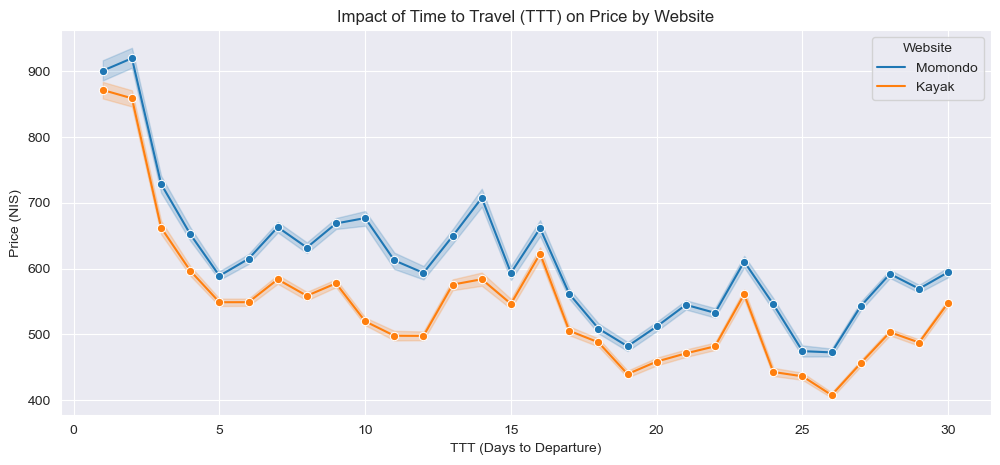

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# מיפוי חזרה לשמות האתרים
site_mapping = {0: "Momondo", 1: "Kayak"}
data_copy["Site"] = data_copy["Site"].map(site_mapping)

# Set figure size
plt.figure(figsize=(12, 5))

# Line plot: Average price for each TTT value per site
sns.lineplot(data=data_copy, x="TTT", y="Price(NIS)", hue="Site", marker="o")

# Graph styling
plt.title("Impact of Time to Travel (TTT) on Price by Website")
plt.xlabel("TTT (Days to Departure)")
plt.ylabel("Price (NIS)")
plt.legend(title="Website")

# Show plot
plt.show()


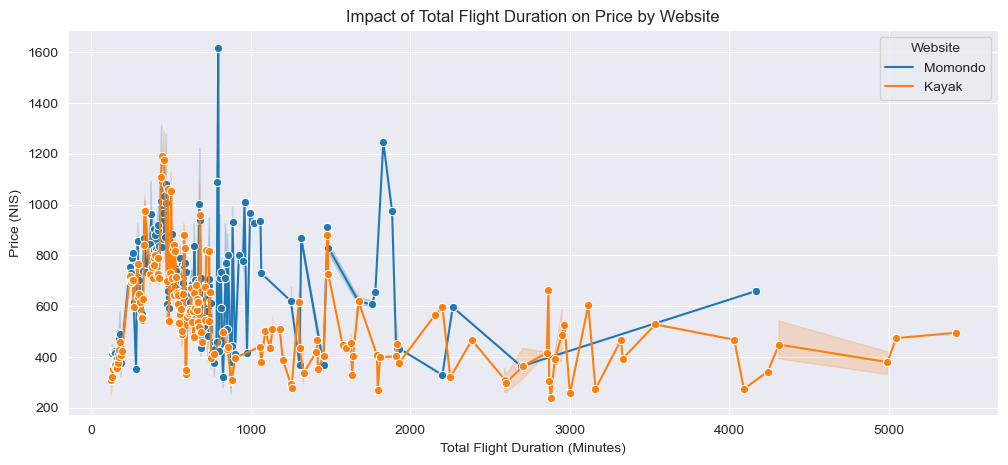

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column for total flight duration (onward + return)
data_copy["Total Flight Duration (min)"] = data_copy["Total Onward Flight Duration(min)"] + data_copy["Onward Connection Duration(min)"] + data_copy["Total Return Flight Duration(min)"] + data_copy["Return Connection Duration(min)"]

# Set figure size
plt.figure(figsize=(12, 5))

# Line plot: Average price for each total flight duration value per site
sns.lineplot(data=data_copy, x="Total Flight Duration (min)", y="Price(NIS)", hue="Site", marker="o")

# Graph styling
plt.title("Impact of Total Flight Duration on Price by Website")
plt.xlabel("Total Flight Duration (Minutes)")
plt.ylabel("Price (NIS)")
plt.legend(title="Website")

# Show plot
plt.show()


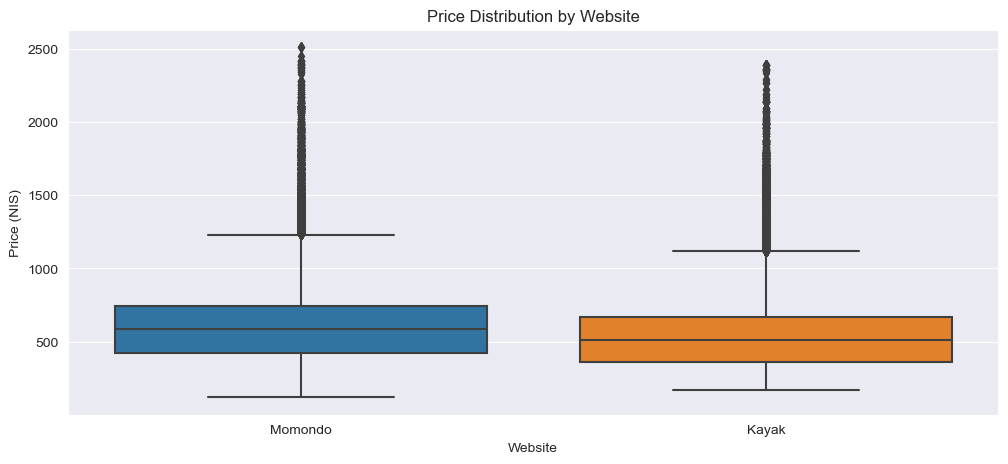

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(12, 5))

# Boxplot: Price distribution per website
sns.boxplot(data=data_copy, x="Site", y="Price(NIS)")

# Graph styling
plt.title("Price Distribution by Website")
plt.xlabel("Website")
plt.ylabel("Price (NIS)")

# Show plot
plt.show()


In [ ]:
import pandas as pd

# Calculate price statistics for each website
price_stats = data_copy.groupby("Site")["Price(NIS)"].agg(["min", "max", "median", "mean", "std", "count"]).reset_index()

# Calculate additional quantiles separately
price_stats["Q1 (25%)"] = data_copy.groupby("Site")["Price(NIS)"].quantile(0.25).values
price_stats["Q3 (75%)"] = data_copy.groupby("Site")["Price(NIS)"].quantile(0.75).values

# Rename columns for clarity
price_stats.columns = [
    "Website", "Min Price", "Max Price", "Median Price", "Mean Price", 
    "Standard Deviation", "Number of Flights", "Q1 (25%)", "Q3 (75%)"
]

# Transpose the table for better readability and round values to 2 decimal places
price_stats_transposed = price_stats.set_index("Website").T.round(2)

# Display the transposed table
display(price_stats_transposed)


Website,Kayak,Momondo
Min Price,168.00,122.00
Max Price,2386.00,2509.00
Median Price,513.00,585.00
Mean Price,545.79,617.10
Standard Deviation,243.21,272.18
Number of Flights,102484.00,77013.00
Q1 (25%),365.00,426.00
Q3 (75%),666.00,747.00


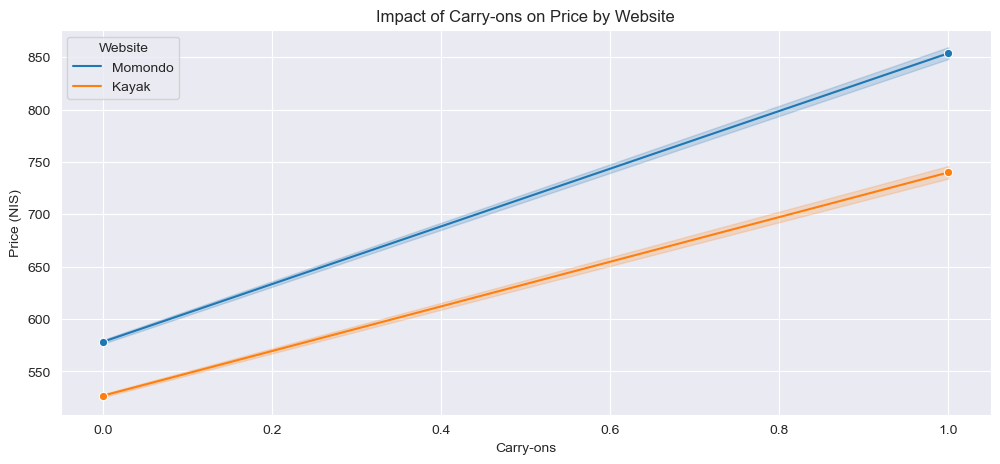

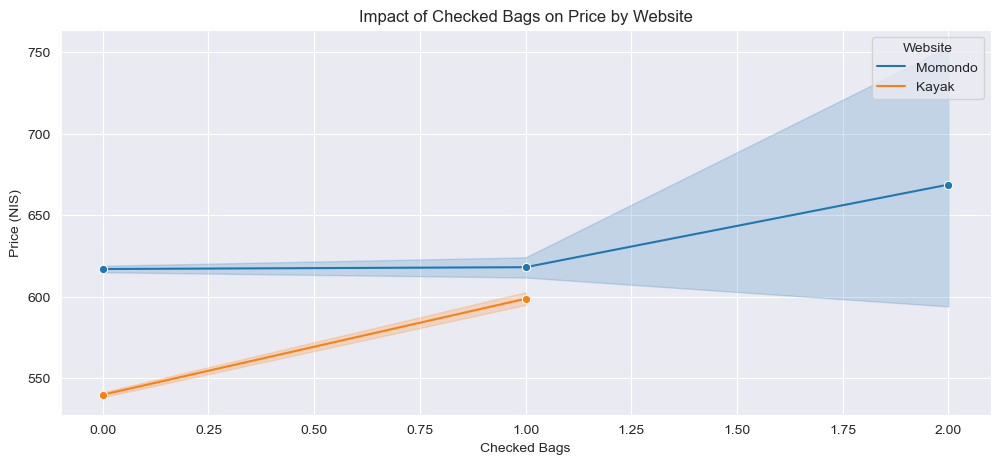

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert NaN values to 0 and change data type to integer
data_copy["Carry-ons"] = data_copy["Carry-ons"].fillna(0).astype(int)
data_copy["Checked Bags"] = data_copy["Checked Bags"].fillna(0).astype(int)

# Create a plot for Carry-ons impact on price
plt.figure(figsize=(12, 5))
sns.lineplot(data=data_copy, x="Carry-ons", y="Price(NIS)", hue="Site", marker="o")

# Styling
plt.title("Impact of Carry-ons on Price by Website")
plt.xlabel("Carry-ons")
plt.ylabel("Price (NIS)")
plt.legend(title="Website")

# Show plot
plt.show()

# Create a plot for Checked Bags impact on price
plt.figure(figsize=(12, 5))
sns.lineplot(data=data_copy, x="Checked Bags", y="Price(NIS)", hue="Site", marker="o")

# Styling
plt.title("Impact of Checked Bags on Price by Website")
plt.xlabel("Checked Bags")
plt.ylabel("Price (NIS)")
plt.legend(title="Website")

# Show plot
plt.show()


In [ ]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179497 entries, 0 to 179503
Data columns (total 50 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Origin                             179497 non-null  object        
 1   Destination                        179497 non-null  object        
 2   TTT                                179497 non-null  int64         
 3   LOS                                179497 non-null  int64         
 4   Onward Departure Airport           179497 non-null  object        
 5   Onward Arrival Airport             179497 non-null  object        
 6   Return Departure Airport           179497 non-null  object        
 7   Return Arrival Airport             179497 non-null  object        
 8   Onward Flight Connections          179497 non-null  int64         
 9   Onward Connection Duration(min)    179497 non-null  int64         
 10  Onward Flight Connection 

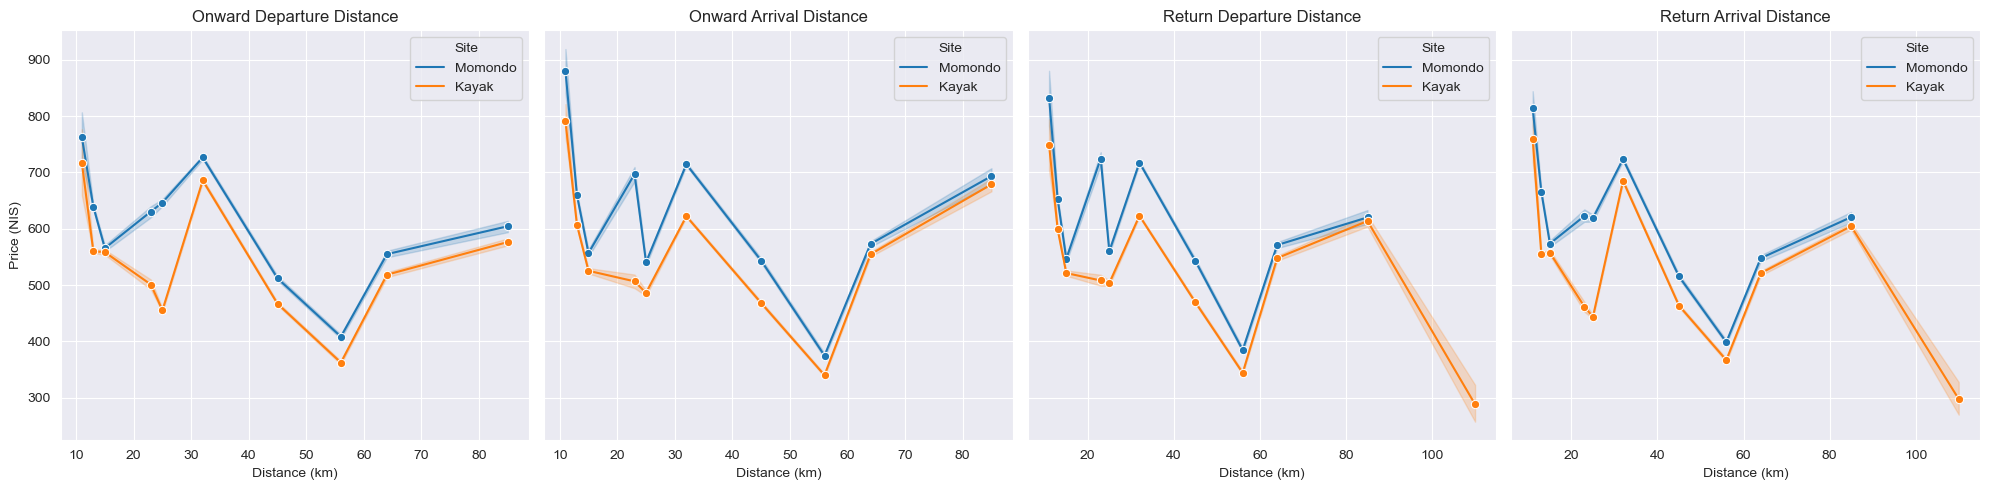

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# רשימת המשתנים להצגה
distance_columns = [
    "Onward Departure Airport Distance",
    "Onward Arrival Airport Distance",
    "Return Departure Airport Distance",
    "Return Arrival Airport Distance"
]

# יצירת גרף עם 4 תת-גרפים להצגת השפעת כל משתנה על המחיר
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

# כותרות לגרפים
titles = [
    "Onward Departure Distance",
    "Onward Arrival Distance",
    "Return Departure Distance",
    "Return Arrival Distance"
]

# יצירת כל גרף
for i, col in enumerate(distance_columns):
    sns.lineplot(data=data_copy, x=col, y="Price(NIS)", hue="Site", marker="o", ax=axes[i])
    axes[i].set_title(titles[i])
    axes[i].set_xlabel("Distance (km)")

# הוספת תווית Y משותפת
axes[0].set_ylabel("Price (NIS)")

# הצגת הגרפים
plt.tight_layout()
plt.show()


C:\Users\talmo\AppData\Local\Temp\ipykernel_22404\4085528524.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\talmo\AppData\Local\Temp\ipykernel_22404\4085528524.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


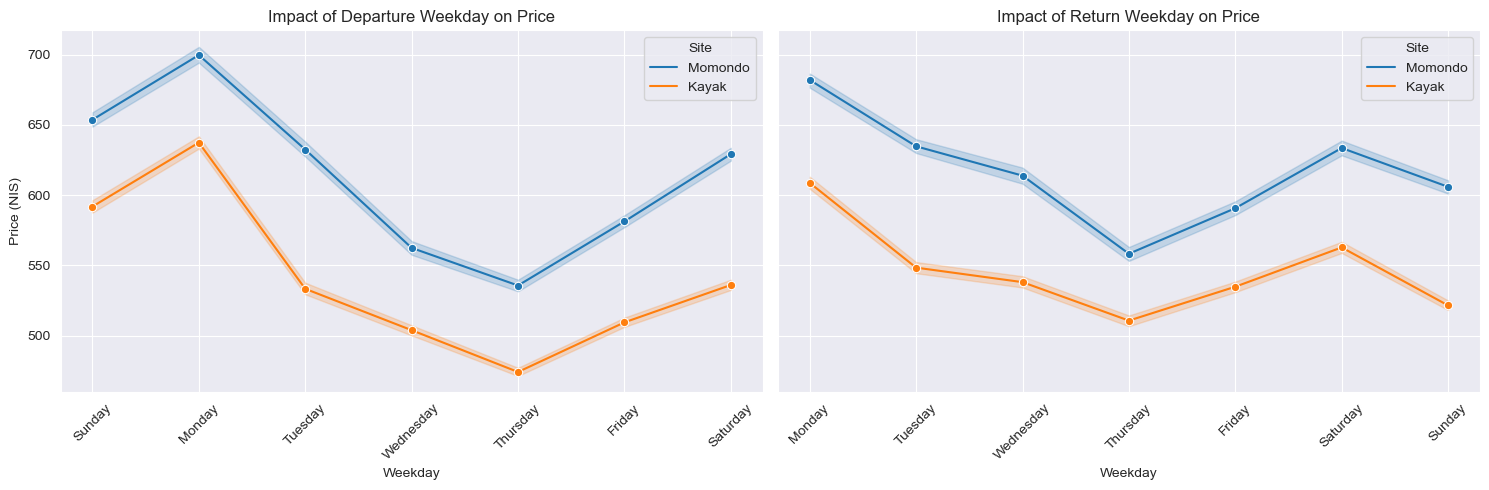

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# יצירת מילון למיפוי מספרי השבוע לימים
weekday_mapping = {
    0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday",
    4: "Friday", 5: "Saturday", 6: "Sunday"
}

# החלפת מספרי השבוע בשמות הימים
data_copy["Departure Weekday"] = data_copy["Departure Weekday"].map(weekday_mapping)
data_copy["Return Weekday"] = data_copy["Return Weekday"].map(weekday_mapping)

# רשימת המשתנים להצגה
weekday_columns = ["Departure Weekday", "Return Weekday"]

# יצירת גרף עם 2 תת-גרפים להצגת השפעת יום היציאה והחזרה על המחיר
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

# כותרות לגרפים
titles = ["Impact of Departure Weekday on Price", "Impact of Return Weekday on Price"]

# יצירת כל גרף
for i, col in enumerate(weekday_columns):
    sns.lineplot(data=data_copy, x=col, y="Price(NIS)", hue="Site", marker="o", ax=axes[i])
    axes[i].set_title(titles[i])
    axes[i].set_xlabel("Weekday")

# הוספת תווית Y משותפת
axes[0].set_ylabel("Price (NIS)")

# סיבוב התוויות בציר ה-X כדי למנוע חפיפות
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# הצגת הגרפים
plt.tight_layout()
plt.show()


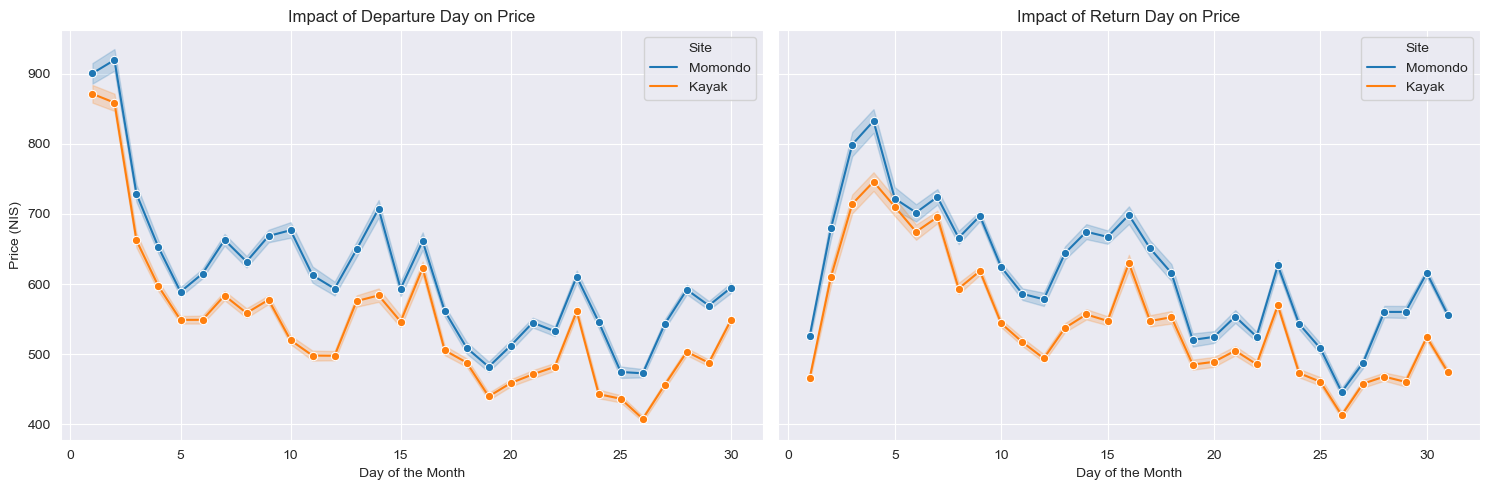

In [ ]:
# רשימת המשתנים להצגה
day_columns = ["Departure Day", "Return Day"]

# יצירת גרף עם 2 תת-גרפים להצגת השפעת יום היציאה והחזרה על המחיר
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

# כותרות לגרפים
titles = ["Impact of Departure Day on Price", "Impact of Return Day on Price"]

# יצירת כל גרף
for i, col in enumerate(day_columns):
    sns.lineplot(data=data_copy, x=col, y="Price(NIS)", hue="Site", marker="o", ax=axes[i])
    axes[i].set_title(titles[i])
    axes[i].set_xlabel("Day of the Month")

# הוספת תווית Y משותפת
axes[0].set_ylabel("Price (NIS)")

# הצגת הגרפים
plt.tight_layout()
plt.show()


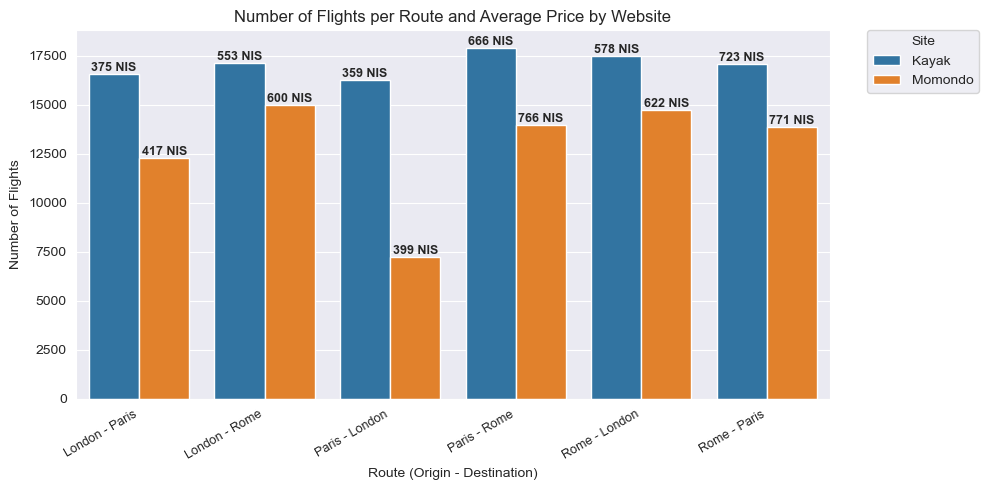

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# חישוב כמות הטיסות לכל מסלול ולכל אתר
route_counts = data_copy.groupby(["Origin", "Destination", "Site"]).size().reset_index(name="Flight Count")

# חישוב המחיר הממוצע לכל מסלול ולכל אתר
route_avg_price = data_copy.groupby(["Origin", "Destination", "Site"])["Price(NIS)"].mean().reset_index()

# מיזוג הנתונים כך שכל מסלול כולל גם כמות טיסות וגם מחיר ממוצע
route_summary = pd.merge(route_counts, route_avg_price, on=["Origin", "Destination", "Site"])

# יצירת עמודה חדשה שמאחדת Origin ו-Destination לשם מסלול
route_summary["Route"] = route_summary["Origin"] + " - " + route_summary["Destination"]

# יצירת גרף קטן יותר ונקי יותר
fig, ax = plt.subplots(figsize=(10, 5))  # שינוי גודל הגרף

# יצירת barplot להצגת כמות הטיסות לפי מסלול ואתר
bar_plot = sns.barplot(
    data=route_summary, x="Route", y="Flight Count", hue="Site", dodge=True, ax=ax
)

# הוספת תגיות מחיר ממוצע מעל כל עמודה
for container, site in zip(bar_plot.containers, route_summary["Site"].unique()):
    prices = route_summary[route_summary["Site"] == site]["Price(NIS)"].values  # מבטיח שהתוויות מסונכרנות עם הנתונים
    bar_plot.bar_label(container, labels=[f"{p:.0f} NIS" for p in prices], label_type="edge", fontsize=9, fontweight="bold")

# כותרת וצירים
ax.set_title("Number of Flights per Route and Average Price by Website", fontsize=12)  # הקטנת כותרת
ax.set_xlabel("Route (Origin - Destination)", fontsize=10)
ax.set_ylabel("Number of Flights", fontsize=10)

# סיבוב התוויות בציר ה-X לזווית עדינה יותר
ax.set_xticklabels(route_summary["Route"].unique(), rotation=30, ha='right', fontsize=9)

# שינוי מיקום המקרא מחוץ לגרף
plt.legend(title="Site", bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)

# הצגת הגרף
plt.tight_layout()
plt.show()


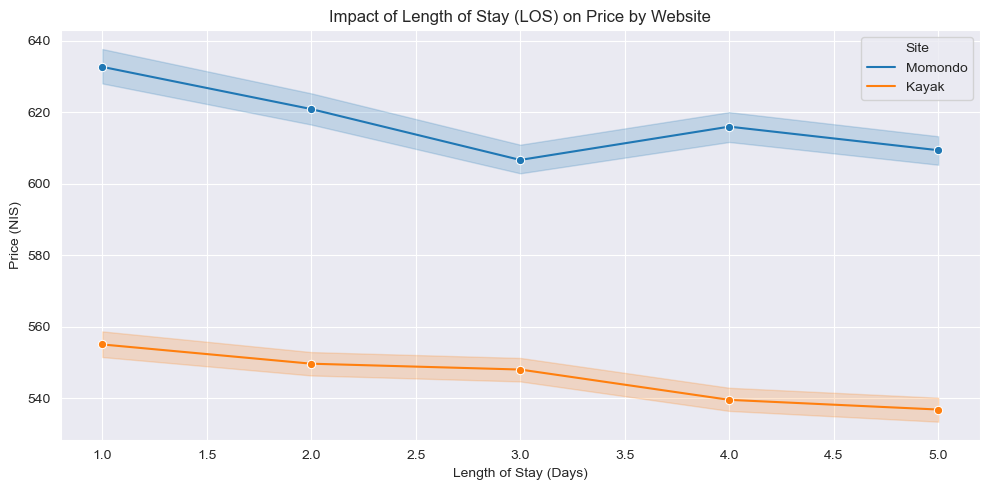

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# יצירת גרף קו להצגת השפעת LOS על המחיר בכל אתר
plt.figure(figsize=(10, 5))

sns.lineplot(data=data_copy, x="LOS", y="Price(NIS)", hue="Site", marker="o")

# הגדרות גרף
plt.title("Impact of Length of Stay (LOS) on Price by Website", fontsize=12)
plt.xlabel("Length of Stay (Days)", fontsize=10)
plt.ylabel("Price (NIS)", fontsize=10)
plt.legend(title="Site")

# הצגת הגרף
plt.tight_layout()
plt.show()


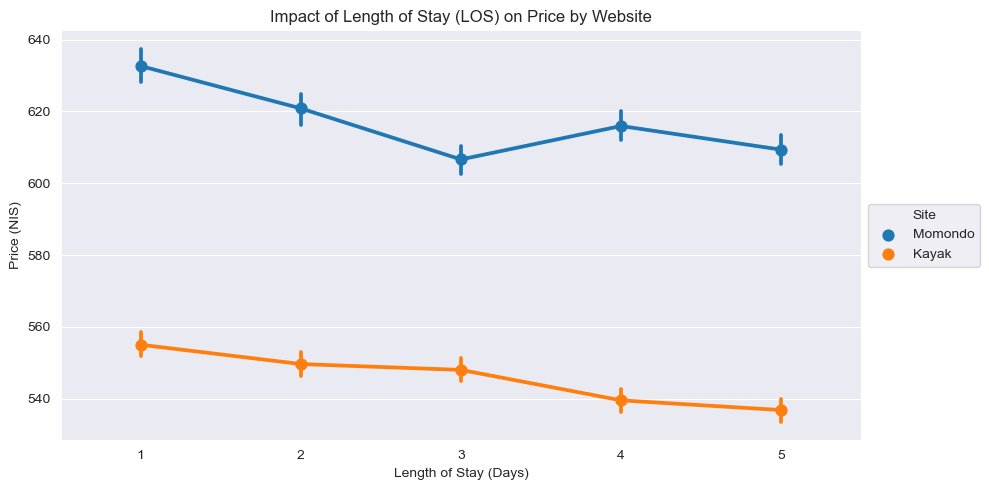

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# יצירת גרף Pointplot להצגת מגמת המחירים לפי LOS
plt.figure(figsize=(10, 5))
sns.pointplot(data=data_copy, x="LOS", y="Price(NIS)", hue="Site", markers="o", linestyles="-")

# הוספת כותרות ותוויות
plt.title("Impact of Length of Stay (LOS) on Price by Website")
plt.xlabel("Length of Stay (Days)")
plt.ylabel("Price (NIS)")

# הצגת המקרא מחוץ לגרף
plt.legend(title="Site", loc="center left", bbox_to_anchor=(1, 0.5))

# הצגת הגרף
plt.tight_layout()
plt.show()


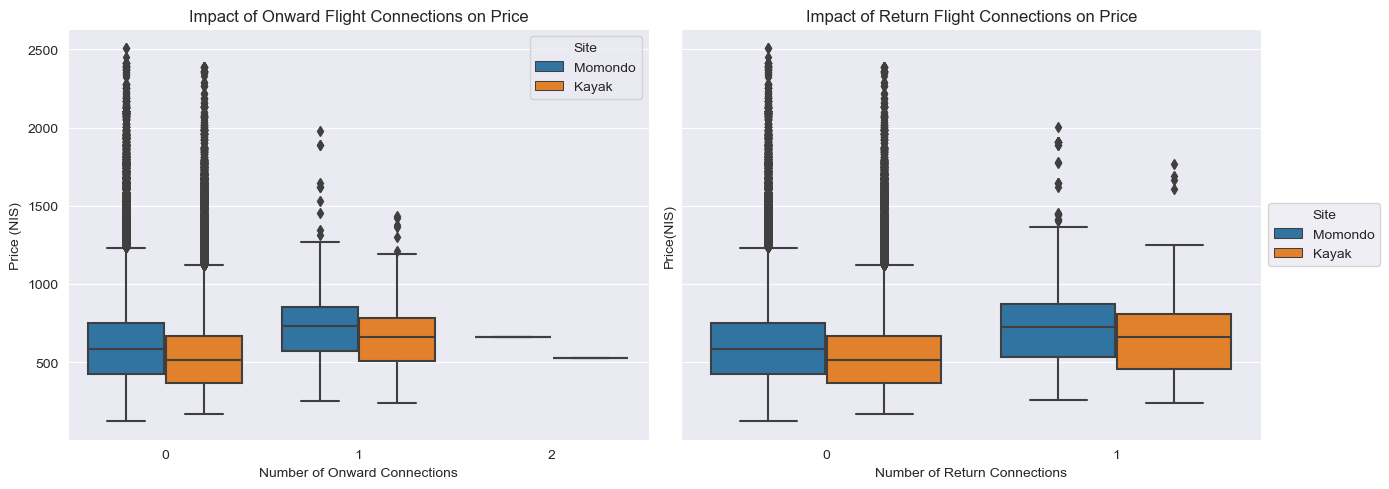

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# יצירת גרף עם שני תת-גרפים (Onward & Return Flight Connections)
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Boxplot עבור כמות הקונקשנים בהלוך
sns.boxplot(data=data_copy, x="Onward Flight Connections", y="Price(NIS)", hue="Site", ax=axes[0])
axes[0].set_title("Impact of Onward Flight Connections on Price")
axes[0].set_xlabel("Number of Onward Connections")
axes[0].set_ylabel("Price (NIS)")

# Boxplot עבור כמות הקונקשנים בחזור
sns.boxplot(data=data_copy, x="Return Flight Connections", y="Price(NIS)", hue="Site", ax=axes[1])
axes[1].set_title("Impact of Return Flight Connections on Price")
axes[1].set_xlabel("Number of Return Connections")

# הצגת המקרא מחוץ לגרף
axes[1].legend(title="Site", loc="center left", bbox_to_anchor=(1, 0.5))

# התאמת התצוגה
plt.tight_layout()
plt.show()


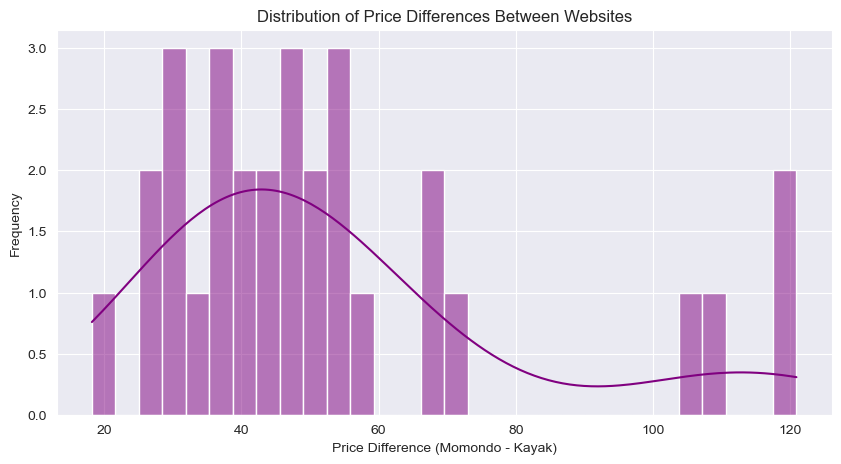

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# חישוב המחירים לכל מסלול ולכל אתר
price_by_site = data_copy.groupby(["Origin", "Destination", "LOS", "Site"])["Price(NIS)"].mean().unstack()

# חישוב ההפרש בין המחירים של Momondo ו-Kayak
price_by_site["Price Difference"] = price_by_site["Momondo"] - price_by_site["Kayak"]

# יצירת גרף היסטוגרמה להצגת התפלגות הפרשי המחירים
plt.figure(figsize=(10, 5))
sns.histplot(price_by_site["Price Difference"], kde=True, bins=30, color="purple")

# הוספת כותרות
plt.title("Distribution of Price Differences Between Websites")
plt.xlabel("Price Difference (Momondo - Kayak)")
plt.ylabel("Frequency")

# הצגת הגרף
plt.show()
